In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
features=pd.DataFrame(boston.data, columns=boston.feature_names)
target=pd.DataFrame(boston.target, columns=["TARGET"]) #create a target col

In [6]:
data = pd.concat([features, target], axis=1)
data.head(10) #fetch 1st 10 values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
correlation=data.corr('pearson')#pearson correlation
#correlation bw each of the colwid each other

In [8]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
abs(correlation['TARGET']).sort_values()
#correlation wid target-sort it nd take the abs value--> RM & LSTAT r closer to target

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
TARGET     1.000000
Name: TARGET, dtype: float64

In [10]:
X1= data["RM"] #to plot
Y = data["TARGET"]
X2=data["LSTAT"]

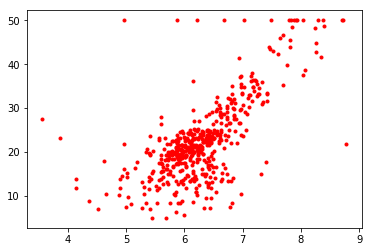

In [11]:
plt.plot(X1,Y,'r.')

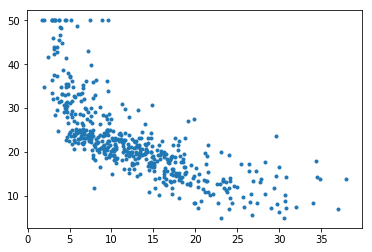

In [12]:
plt.plot(X2,Y,'.')

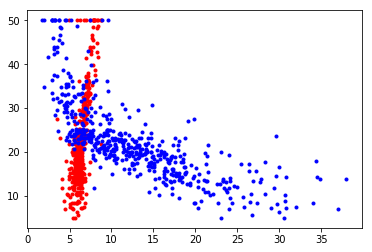

In [13]:
plt.plot(X1,Y,'r.', X2,Y,'b.')

In [14]:
#normaliztion ,to scale
X1=(X1-X1.min())/(X1.max() - X1.min())
Y=(Y-Y.min())/(Y.max() - Y.min())
X2=(X2-X2.min())/(X2.max() - X2.min())

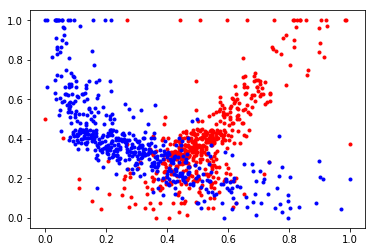

In [15]:
plt.plot(X1,Y,'r.', X2,Y,'b.')

In [16]:
x1= np.array(X1)#for RM
y= np.array(Y)#for target
x2=np.array(X2)#for LSTAT

In [17]:
x1_train,x1_test,x2_train,x2_test,y_train,y_test= train_test_split(x1,x2,y,test_size=0.2)
#split the data into training nd testing(20% test data)

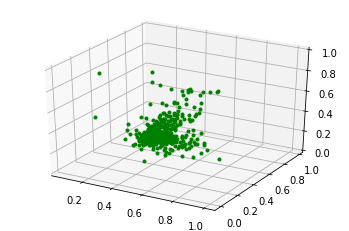

In [18]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_train, x2_train, y_train, 'g.')

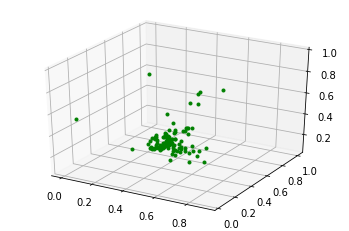

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_test, x2_test, y_test, 'g.')

In [20]:
x1_train.size

404

In [21]:
x2_train.size

404

In [22]:
len(x1)

506

In [23]:
len(x2)

506

In [24]:
def hypothesis(a,x1,b,x2,c):
    return a * x1 +b * x2 +c #hypothesis eq 

In [25]:
def error(a,x1,b,x2,c,y):
    e=0     #holds the error value
    m=len(x1)#how many data_pts r present
    
    for i in range(m):
        e += np.power((hypothesis(a,x1[i],b,x2[i],c)-y[i]),2) #e=summation(h-y)2
        
    return (1/(2*m)) *e #loss fn

In [26]:
def step_gradient(a,x1,b,x2,c,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    m= len(x1)
    
    for i in range(m):
        grad_a += (1/m) * (hypothesis(a,x1[i],b,x2[i],c)-y[i])*x1[i] #differentaition wrt a (hw to move)
        grad_b +=(1/m) * (hypothesis(a,x1[i],b,x2[i],c)-y[i])*x2[i]#diff wrt b
        grad_c += (1/m) * (hypothesis(a,x1[i],b,x2[i],c)-y[i]) #diff wrt c
        
    a=a-grad_a*learning_rate #to get the steps(hw much to move)
    b=b-grad_b*learning_rate
    c=c-grad_c*learning_rate
    
    return a,b,c

In [27]:
def descend(init_a,x1,init_b,x2,init_c,y,learning_rate,iteration):
    a=init_a
    b=init_b
    c=init_c
    
    for i in range(iterations): #iterations--> hw many times we step
        e=error(a,x1,b,x2,c,y)
        
        if i% 1000 == 0:
            print(f"Error: {np.sqrt(e)}, a: {a}, b:{b}, c:{c}") #print error at every 1000 step
            #sqrt of mean error
            
        a,b,c =step_gradient(a,x1,b,x2,c,y,learning_rate)#pass a,b,c,learning_rate values
        
    return a,b,c
    

In [28]:
a=0.368191606008212
b=-0.29221331280500346
c=0.2834919247082417
learning_rate = 0.001
iterations = 10000

In [29]:
final_a, final_b, final_c = descend(a,x1_train,b,x2_train,c,y_train,learning_rate,iterations)

Error: 0.09872770809745882, a: 0.368191606008212, b:-0.29221331280500346, c:0.2834919247082417
Error: 0.09757482257981005, a: 0.3771707424723541, b:-0.30410837947557434, c:0.2852978379361268
Error: 0.09654804562556499, a: 0.3849816875227287, b:-0.31586235110663613, c:0.285544189689291
Error: 0.09560998894722554, a: 0.39224894396655074, b:-0.3271487359868589, c:0.2853899258660781
Error: 0.09475198379874024, a: 0.39914322535041685, b:-0.33790530399837976, c:0.28513033325747295
Error: 0.09396763473575155, a: 0.40571916390624807, b:-0.3481360882079471, c:0.28484083278888855
Error: 0.09325107372602232, a: 0.4120013044645916, b:-0.3578610310875602, c:0.28454086369657394
Error: 0.09259683271319936, a: 0.41800602092023015, b:-0.3671032127008925, c:0.2842356023814487
Error: 0.09199982098575704, a: 0.4237471199414609, b:-0.3758856434993256, c:0.2839265829202334
Error: 0.09145530844537118, a: 0.4292372909272137, b:-0.3842304897578294, c:0.28361440117732334


### root mean sq Error: 0.09898385261548172 this is for training data

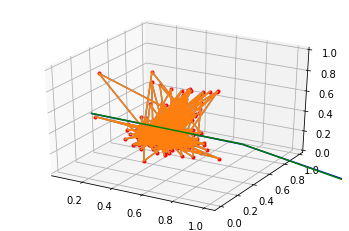

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot(x1_test, x2_test, y_test, 'g.')

ax.plot(x1_train,x2_train,y_train, 'r.',
        x1_train,x2_train, hypothesis(a,x1_train,b,x2_train,c),'b',
        x1_train,x2_train, hypothesis(final_a,x1_train,final_b,x2_train,final_c),'g')

In [33]:
final_a,final_b,final_c

(0.43448849745630297, -0.39215891624401095, 0.2832994036968669)

In [34]:
len(x1_test)

102

In [35]:
x1_test[:3]

array([0.56620042, 0.52500479, 0.69017053])

In [36]:
x2_test[:3]

array([0.12775938, 0.40011038, 0.12775938])

In [37]:
y_test[:3]

array([0.40222222, 0.22      , 0.59111111])

In [38]:
hypothesis(final_a,x1_test[:3],final_b,x2_test[:3],final_c)

array([0.47920499, 0.35450109, 0.53306858])

In [39]:
error(final_a,x1_test,final_b,x2_test,c,y_test)#mean error

0.00879973557567284

In [40]:
np.sqrt(error(final_a,x1_test,final_b,x2_test,final_c,y_test))#root mean sq error

0.09379675377454395

### root mean sq Error: 0.09773516479628457 this is for testing data